# Case study - favourable words from restaurant reviews

In [9]:
# import the required libraries here
import pandas as pd
import matplotlib.pyplot as plt

## Most popular restaurant category
Hopefully you had a look at the data dictionary [here](https://www.yelp.com/dataset/documentation/main)
and concluded that the business.json file was the best place to start to answer the question of what is the most popular category. We load the data in from file for you. If the data file is in your working directory, with this notebooks, this should work. Then we perform some typical quick looks at it.

In [10]:
# For convenience here, we are accessing the data in the working directory that contains our notebooks.
# Normal best practise is to keep your data separate, but this keeps things simple.
business = pd.read_json('yelp_academic_dataset_business.json', lines=True)

In [11]:
business.shape

(209393, 14)

In [12]:
business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,10913 Bailey Rd,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...",f9NumwFMBDn751xgFiRbNA,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...",Cornelius,"{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...",1,35.462724,-80.852612,The Range At Lake Norman,28031,36,3.5,NC
1,"8880 E Via Linda, Ste 107","{'GoodForKids': 'True', 'ByAppointmentOnly': '...",Yzvjg0SayhoZgCljUJRF9Q,"Health & Medical, Fitness & Instruction, Yoga,...",Scottsdale,None,1,33.569404,-111.890264,"Carlos Santo, NMD",85258,4,5.0,AZ
2,3554 Rue Notre-Dame O,None,XNoUzKckATkOD1hP6vghZg,"Pets, Pet Services, Pet Groomers",Montreal,None,1,45.479984,-73.580070,Felinus,H4C 1P4,5,5.0,QC
3,1015 Sharp Cir,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...",6OAZjbxqM5ol29BuHsil3w,"Hardware Stores, Home Services, Building Suppl...",North Las Vegas,"{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ...",0,36.219728,-115.127725,Nevada House of Hose,89030,3,2.5,NV
4,4827 E Downing Cir,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...",51M2Kk903DFYI6gnB5I6SQ,"Home Services, Plumbing, Electricians, Handyma...",Mesa,"{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '...",1,33.428065,-111.726648,USE MY GUY SERVICES LLC,85205,26,4.5,AZ


In [13]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209393 entries, 0 to 209392
Data columns (total 14 columns):
address         209393 non-null object
attributes      180348 non-null object
business_id     209393 non-null object
categories      208869 non-null object
city            209393 non-null object
hours           164550 non-null object
is_open         209393 non-null int64
latitude        209393 non-null float64
longitude       209393 non-null float64
name            209393 non-null object
postal_code     209393 non-null object
review_count    209393 non-null int64
stars           209393 non-null float64
state           209393 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 22.4+ MB


Not all columns are useful to us here. We are pretty sure we aren't interested in the specific address, attributes (facilities offered), the hours open, whether it's still open or not, the latitude and longitude, and the name of the restaurant. We also decide we aren't interested in drilling down to the postal code or neighborhood level either, so go ahead and drop those columns as well. You will now create a list of these columns and drop them from the DataFrame. Remember the axis and inplace arguments! Also, notice that there are fewer non-null categories than there are business_id. We'll come back to this point later.

In [15]:
# task: create a list of columns to drop, call it drop_cols
# then go ahead and drop those columns from the DataFrame
# two lines of code here:
drop_cols = ['address', 'attributes', 'hours', 'is_open', 'latitude', 'longitude', 'name', 'postal_code']
business.drop(drop_cols, axis=1, inplace=True)

In [16]:
business.head()

,business_id,categories,city,review_count,stars,state
0,f9NumwFMBDn751xgFiRbNA,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...",Cornelius,36,3.5,NC
1,Yzvjg0SayhoZgCljUJRF9Q,"Health & Medical, Fitness & Instruction, Yoga,...",Scottsdale,4,5.0,AZ
2,XNoUzKckATkOD1hP6vghZg,"Pets, Pet Services, Pet Groomers",Montreal,5,5.0,QC
3,6OAZjbxqM5ol29BuHsil3w,"Hardware Stores, Home Services, Building Suppl...",North Las Vegas,3,2.5,NV
4,51M2Kk903DFYI6gnB5I6SQ,"Home Services, Plumbing, Electricians, Handyma...",Mesa,26,4.5,AZ


Okay, so now we have a much more manageable (width) of data. Remember our first task is to identify the most popular type of restaurant. We now have our eye on the categories column. We could simply count each individual category in this column, just as we did with our pet owners survey. But our categories column isn't quite in the same format as that data. Each item in categories is actually a string, as we demonstrate below, with each item we're interested in separated by commas.

In [17]:
# print the first element of business['categories']
print(business.categories[0])

Active Life, Gun/Rifle Ranges, Guns & Ammo, Shopping


In [18]:
# what is the type of this element?
type(business.categories[0])

str

In [19]:
# if the first element were a list, this would return 'Tours', not 'T'
business.categories[0][0]

'A'

You're now going to use [this](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.split.html) pandas Series method to split these strings into lists.

In [20]:
# task: split the categories column (a pandas Series) into lists of categories,
# e.g. the string "Category1, Category2" becomes the list ["Category1", "Category2"]
# hint: pass the argument pat = ', ?' in to split on a comma which may be followed by a space
business['categories'] = business['categories'].str.split(pat = ', ?')

In [21]:
business['categories'].head()

0    [Active Life, Gun/Rifle Ranges, Guns & Ammo, S...
1    [Health & Medical, Fitness & Instruction, Yoga...
2                   [Pets, Pet Services, Pet Groomers]
3    [Hardware Stores, Home Services, Building Supp...
4    [Home Services, Plumbing, Electricians, Handym...
Name: categories, dtype: object

See we now have a pandas Series of lists. Go ahead now and use the technique you learnt in the pet owners survey to print the top (most frequent) categories. We don't need to keep the raw, very long, list of categories, so go ahead and chain the method for counting the values and outputting the top twenty in one go. This may take your computer a minute or two.

In [22]:
# task: count the frequency of each item in categories and keep the top twenty
# hint: the latter can be done by passing an argument to the head method
# assign the result to the variable category_counts - one line of code here:
category_counts = business['categories'].apply(pd.Series).stack().reset_index(drop=True).value_counts().head(20)

Now we introduce you to a new kind of plot: a bar plot. This gives us a nice visual representation of the frequency of the top 20 categories.

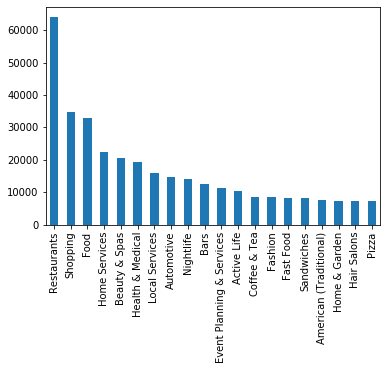

In [23]:
category_counts.plot(kind='bar')

This has given us our first surprise. Our dataset contains more than just our desired industry (Restaurants). Someone hasn't thought to give us just the data we wanted. Over time this will surprise you less and less. In fact, as a data scientist, you'll become surprised when someone gives you a clean dataset containing only the data you wanted! Restaurants do seem to be our most frequent type of business, but represent fewer than 60,000 out of our original 188,000 businesses. We now figure we want to filter and keep just those businesses that have 'Restaurant' in their categories entry.



Before we start filtering on categories, however, remember we noticed early on that there were fewer non-null categories than there were business_id? How many null (missing) categories are there?

In [25]:
pd.isna(business['categories']).sum()

524

#### There are 524 business_id that have no category associated with them. Clearly these are not much use to us. First, we will have a quick look at the first few of them to check

In [26]:
business.loc[pd.isna(business['categories'])].head()

,business_id,categories,city,review_count,stars,state
141,2W1tLg8ybRUEKMPoAPHTsQ,None,Las Vegas,3,1.0,NV
217,oCbk_T5eyc3KB0iT6T5q9w,None,Lorain,4,1.0,OH
293,4YI_gJQuW-8d_o2xvflJxA,None,Scottsdale,6,1.5,AZ
570,reOlnE49Ug3BMSGn3IAweg,None,McKeesport,3,5.0,PA
747,KnAV3ZhOWWNhqnvqIkxYOg,None,Scottsdale,3,1.5,AZ


Sure enough there is no information in the categories column for these businesses. Go ahead and remove these 541 rows from the DataFrame. Assign the result back to the original DataFrame.

In [27]:
# hint, the opposite of pd.isna() is ~pd.isna()
# one line of code here, assigning the result back to business
business = business.loc[~pd.isna(business['categories'])]

Remember how you filtered our pet owner survey to select just dog owners? Now you're going to filter our business DataFrame to keep just those rows (businesses) that are restaurants. You'll do this in exactly the same way you did when testing whether 'dog' was in the list, although you'll keep all columns, not calculate a summary statistic, and will overwrite the original business DataFrame. Remember, we have a nice tidy list of categories now.

In [28]:
business = business.loc[business['categories'].apply(lambda x: 'Restaurants' in x), :]

In [29]:
business.shape

(63944, 6)

And now we can count the different categories for what should now just be restaurants

In [30]:
restaurant_category_counts = business['categories'].apply(pd.Series).stack().reset_index(drop=True).value_counts().head(20)

In [31]:
restaurant_category_counts.head()

Restaurants    63944
Food           16480
Nightlife       9400
Bars            9004
Fast Food       8106
dtype: int64

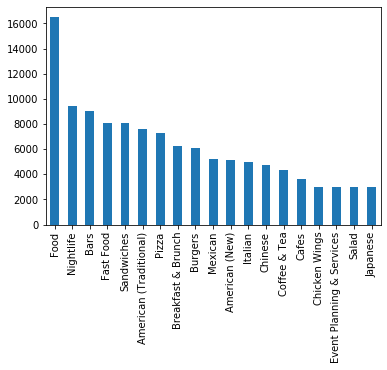

In [32]:
# 'Restaurants', of course, is our most frequent entry because, by definition, it is
# present in every case! Plot a bar chart now of the frequencies of the other values.
restaurant_category_counts[1:].plot(kind='bar')

We see we still have a few noise categories coming in, such as 'Food' and 'Nightlife'. But we can see that Pizza restaurants would seem to be a good bet for our marketing campaign trial! However, we also notice that Italian is pretty close behind, and using our domain knowledge, we figure that we'll use businesses that mention either Pizza or Italian.

## Save desired business ID to file
Now it's time to create the final list of the business IDs we're interested in. These are (Restaurant) businesses that have either 'Italian' or 'Pizza' in their categories column.

In [33]:
# task use a lambda function on the categories column again, but now you're not testing for
# 'Restaurant' but either 'Pizza or 'Italian'
# assign the result to italian_pizza (one line of code)
italian_pizza = business.loc[business['categories'].apply(lambda x: ('Pizza' in x) | ('Italian' in x)), :]

In [34]:
italian_pizza.head()

,business_id,categories,city,review_count,stars,state
63,ZkzutF0P_u0C0yTulwaHkA,"[Restaurants, Pizza]",Plum,31,4.0,PA
86,OWkS1FXNJbozn-qPg3LWxg,"[Food, Food Trucks, Restaurants, Pizza]",Las Vegas,11,4.5,NV
90,6GHwgKNlvfIMUpFaxgBjUA,"[Sandwiches, Italian, Restaurants]",MontrÃ©al,9,4.0,QC
105,-C0AlwLuXpcP609madJZQQ,"[Restaurants, Pizza]",Milton,7,3.5,ON
120,39lLJK_rrYY2NYomSsQdUA,"[Restaurants, Pizza]",Beachwood,11,2.5,OH


In [35]:
# Check the shape of the DataFrame
italian_pizza.shape

(9827, 6)

In [36]:
# task: use panda's to_csv DataFrame method to save the result to a file
# use the index argument to suppress saving the index
# use the columns argument to save only the business_id, review_count, stars, and state columns
# one line of code here
italian_pizza.to_csv('business_list.csv', columns=['business_id', 'review_count', 'stars', 'state'], index=False)

# Summary
Well done. You've done some pretty impressive data wrangling and some exploratory data analysis. You've read in some data and extracted a list of categories from one column, which is a pretty tricky thing to do! You've then explored the data and discovered a popular type of cuisine, then used that to extract just the relevant business IDs so you can use them as a key in your next step.